# __Observations and Insights__

## Prepare the Data:

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice --> Unique IDs
numb_mice = data["Mouse ID"].nunique()
numb_mice

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Display data.
#help from classmate
# mouse_duplicate_ids = data[data.duplicated(subset = ["Mouse ID", "Timepoint"])]
# mouse_duplicate_ids


#me  ref: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = data[data.duplicated(['Mouse ID', 'Timepoint'])]
 
print("Duplicate Rows based on Name and Age :")
 
# Print the resultant Dataframe
duplicate


Duplicate Rows based on Name and Age :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# help from classmate
updated_mouse_ids = data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
updated_mouse_ids.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID AND timpoint.

# me https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
clean_data = data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='last')
clean_data




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
updated_num_mice = updated_mouse_ids["Mouse ID"].nunique()
updated_num_mice

249

In [20]:
# Checking the number of mice in the clean DataFrame.
updated_num_mice = clean_data["Mouse ID"].nunique()
updated_num_mice

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Initialize a new data frame with the columns
staistics = pd.DataFrame(columns=['Mean', 'Median', 'Variance','SEM','Standard deviation'])

#Calculations to new df
staistics['Mean'] = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean().round(2)
staistics['Median'] = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median().round(2)
staistics['Variance'] = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var().round(2)
staistics['SEM'] = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem().round(2)
staistics['Standard deviation'] = clean_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std().round(2)

staistics







,Mean,Median,Variance,SEM,Standard deviation
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,0.33,4.99
Ceftamin,52.59,51.78,39.29,0.47,6.27
Infubinol,52.88,51.82,43.13,0.49,6.57
Ketapril,55.24,53.70,68.55,0.60,8.28
Naftisol,54.33,52.51,66.17,0.60,8.13
Placebo,54.03,52.29,61.17,0.58,7.82
Propriva,52.38,50.78,43.22,0.53,6.57
Ramicane,40.22,40.67,23.49,0.32,4.85
Stelasyn,54.23,52.43,59.45,0.57,7.71


In [26]:
# Repeat above using the aggregation method
statistics_new = clean_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median', 'var', 'sem','std']})
statistics_new


Tumor Volume (mm3)                                          
                           mean     median        var       sem       std
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  0.329346  4.994774
Ceftamin              52.591172  51.776157  39.290177  0.469821  6.268188
Infubinol             52.884795  51.820584  43.128684  0.492236  6.567243
Ketapril              55.235638  53.698743  68.553577  0.603860  8.279709
Naftisol              54.331565  52.509285  66.173479  0.596466  8.134708
Placebo               54.033581  52.288934  61.168083  0.581331  7.821003
Propriva              52.382993  50.783528  43.220205  0.526358  6.574208
Ramicane              40.216745  40.673236  23.486704  0.320955  4.846308
Stelasyn              54.233149  52.431737  59.450562  0.573111  7.710419
Zoniferol             53.236507  51.818479  48.533355  0.516398  6.966589

## Bar and Pie Charts

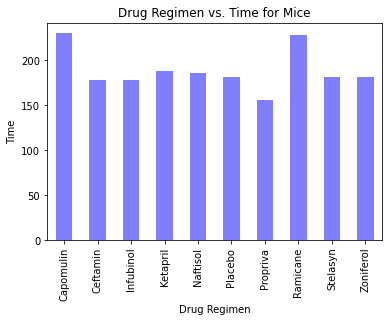

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#Get desired data
data_upd = updated_mouse_ids
drugs = data_upd.groupby('Drug Regimen')
time_total = drugs['Timepoint'].count()

#Plot using pandas
chart_data_upd = time_total.plot(kind='bar', alpha=0.5, align = "center", color = 'blue')
plt.title("Drug Regimen vs. Time for Mice")
chart_data_upd.set_xlabel("Drug Regimen")
chart_data_upd.set_ylabel("Time")

plt.show()

Text(0, 0.5, 'Time')

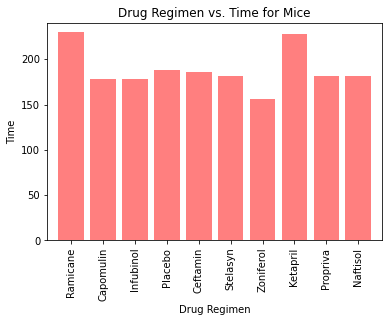

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Desired Data/ plot set up
drugs = data_upd.groupby('Drug Regimen')
x_axis = np.arange(len(drugs))

plt.bar(x_axis, time_total, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Ketapril", "Propriva", "Naftisol"], rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(time_total)+10)
plt.title("Drug Regimen vs. Time for Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Time")


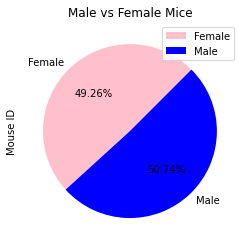

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Data
genders = data_upd[['Mouse ID', 'Sex']].groupby('Sex').count()

#Plot
gender_pie_chart = genders.plot.pie(y = 'Mouse ID', colors = ['pink', 'blue'],startangle = 45,autopct = '%1.2f%%',title = ('Male vs Female Mice'))



(-1.2082308175735104,
 1.1112291096902747,
 -1.1078102009842665,
 1.1003719143325656)

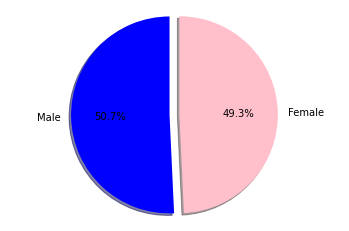

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Plot set up
x_axis = np.arange(len(genders))
labels = ["Male", "Female",]
sizes = [5074, 4926]
colors = ["blue", "pink"]
explode = (0.1, 0)

#Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

#Subset 1: grouped DF
last_tumor_time = data_upd.groupby(['Mouse ID'], as_index = False)['Timepoint'].max()
last_tumor_time = pd.merge(last_tumor_time,data_upd,on = ["Mouse ID","Timepoint"],how = "left")
#helpful to view data while coding
#last_tumor_time

#Subset 2: List for treatment names & empty list for tumor volume data
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list =  ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
main_drugs = last_tumor_time.loc[last_tumor_time['Drug Regimen'].isin(drug_list)]
tumor_data = pd.DataFrame(columns = drug_list)

tumor_vol = []

#Substep 3: Loop through data & append final tumor volume for main drugs

for drug in drug_list:
    tumor_data[drug] = (main_drugs[main_drugs['Drug Regimen'] == drug]['Tumor Volume (mm3)']).reset_index(drop=True)
    
    quartiles = round(tumor_data[drug].quantile([.25,.5,.75]), 2)
    lower_quartile = round(quartiles[0.25], 2)
    upper_quartile = round(quartiles[0.75], 2)
    iqr = round(upper_quartile - lower_quartile, 2)
    
    lower_bound = round(lower_quartile - (1.5*iqr), 2)
    upper_bound = round(upper_quartile + (1.5*iqr), 2)
    
    tumor_data.append([drug, lower_quartile, upper_quartile, iqr, lower_bound, upper_bound])
    
#Summary output
    print(f"{drug}")
    print(f"__________")
    print(f"Lower quartile: {lower_quartile}")
    print(f"Upper quartile: {upper_quartile}")
    print(f"Inter quartile: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")   
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

Capomulin
__________
Lower quartile: 32.38
Upper quartile: 40.16
Inter quartile: 7.78
Lower bound: 20.71
Upper bound: 51.83
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.

Ramicane
__________
Lower quartile: 31.56
Upper quartile: 40.66
Inter quartile: 9.1
Lower bound: 17.91
Upper bound: 54.31
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol
__________
Lower quartile: 54.05
Upper quartile: 65.53
Inter quartile: 11.48
Lower bound: 36.83
Upper bound: 82.75
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.

Ceftamin
__________
Lower quartile: 48.72
Upper quartile: 64.3
Inter quartile: 15.58
Lower bound: 25.35
Upper bound: 87.67
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.



C:\Users\Janssen VR 2\AppData\Local\Temp\ipykernel_15508\1466037942.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumor_data.append([drug, lower_quartile, upper_quartile, iqr, lower_bound, upper_bound])


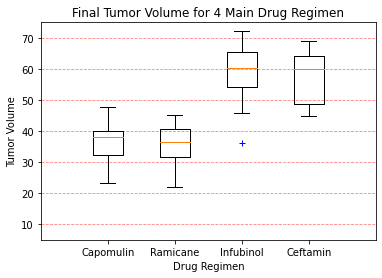

In [38]:
#Box plot of final tumor vol for 4 meds w. highlights of potential outliers
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume for 4 Main Drug Regimen')
ax.set_ylabel('Tumor Volume')
ax.set_xlabel('Drug Regimen')

ax.boxplot(tumor_data, labels = drug_list, sym = 'b+')
ax.yaxis.grid(linestyle = '--', color = 'red', alpha = 0.5)
plt.xlim(0, 5)
plt.ylim(5, 75)
plt.show()
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

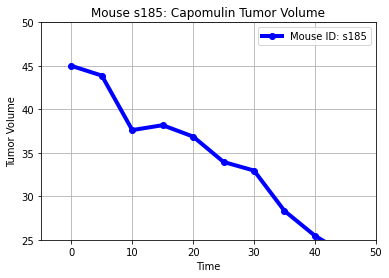

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomul
capomul_id = data_upd.loc[data_upd["Drug Regimen"]=="Capomulin",:].iloc[7]['Mouse ID']
capomul_tumors = data_upd[data_upd['Mouse ID']==capomul_id][['Timepoint','Tumor Volume (mm3)']]

x_axis = capomul_tumors['Timepoint']
y_axis = capomul_tumors['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, linewidth = 4, marker = "o", color = "blue", label = f"Mouse ID: {capomul_id}" )

plt.xlabel("Time")
plt.ylabel('Tumor Volume')
plt.title(f"Mouse {capomul_id}: Capomulin Tumor Volume")
plt.legend(loc='upper right')
plt.xlim(-5,50)
plt.ylim(25,50)
plt.grid()
plt.show()

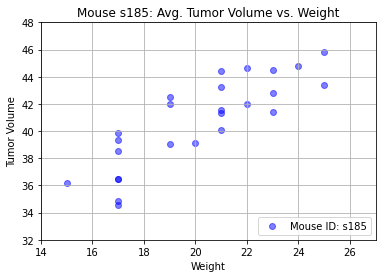

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomul_data = data_upd.loc[data_upd["Drug Regimen"]=="Capomulin",:]
capomul_avg = capomul_data.groupby(['Mouse ID']).mean()

plt.scatter(capomul_avg['Weight (g)'],capomul_avg['Tumor Volume (mm3)'], marker = 'o', color="blue", alpha= 0.5 , label = f"Mouse ID: {capomul_id}")

plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title(f"Mouse {capomul_id}: Avg. Tumor Volume vs. Weight")

plt.legend(loc='lower right')
plt.xlim(14, 27)
plt.ylim(32, 48)
plt.grid()
plt.show()

## Correlation and Regression

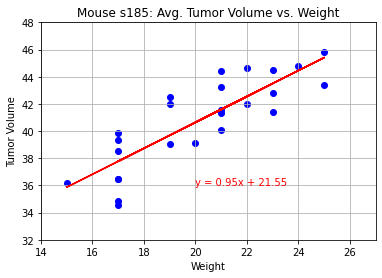

NameError: name 'correlation_coef' is not defined

In [42]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x = capomul_avg['Weight (g)']
y = capomul_avg['Tumor Volume (mm3)']

cap_slope, cap_int, cap_r, cap_p, cap_std_err = linregress(x, y)

(slope, intercept, r, pvalue, stderr) = linregress(x, y)
line_regression = x * slope + intercept
line_equation = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x, y, marker='o', color="blue", alpha = 1,)
plt.plot(x,line_regression,"r-")
plt.annotate(line_equation,(20,36), fontsize = 10, color = "red")

plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title(f"Mouse {capomul_id}: Avg. Tumor Volume vs. Weight")
plt.xlim(14, 27)
plt.ylim(32, 48)
plt.grid()
plt.show()

R = (r**2, 2)

#Summary
summary = pd.DataFrame({
    "Correlation": [correlation_coef],
    "R Squared": [R],
    "Regression Line": [line_equation]})

summary["Correlation"] = summary["Correlation"].map("{:,.2f}".format)
#summary["R Squared"] = summary["R Squared"].map("{:,.2f}".format)

summary